In [8]:
#Import Dataset and read into a dataframe
import pandas as pd
df = pd.read_csv('Poverty.csv')
#print(df.head())

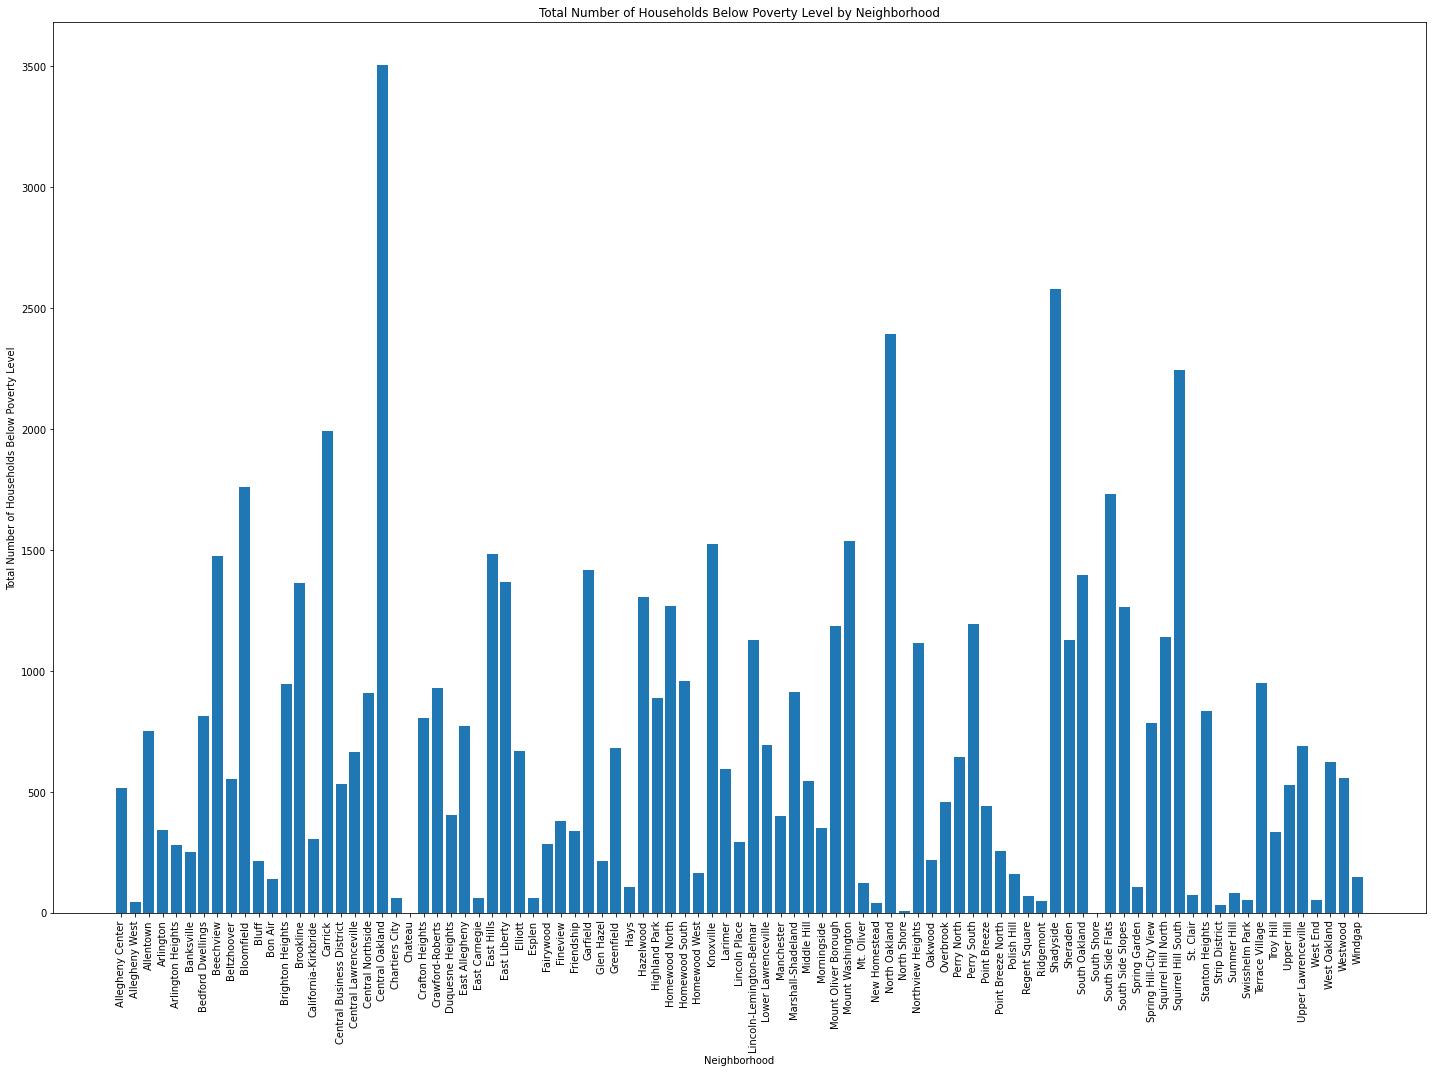

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store the below poverty totals for each neighborhood
neighborhood_below_poverty_totals = {}

# Iterate over the rows of the DataFrame, and pairing the neighborhood with its respective poverty total
for index, row in df.iterrows():
    neighborhood = row['Neighborhood']
    below_poverty_total = row['Estimate; Income in the past 12 months below poverty level:']
    neighborhood_below_poverty_totals[neighborhood] = below_poverty_total

# Plotting the bar plot for below poverty levels
plt.figure(figsize=(20, 15))
plt.bar(neighborhood_below_poverty_totals.keys(), neighborhood_below_poverty_totals.values())
plt.title('Total Number of Households Below Poverty Level by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Total Number of Households Below Poverty Level')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



This above graphic reflects the amount of households below the poverty line in all Pittsburgh neighborhoods. There is alot of variability between neighborhoods but there are clear outliers that are especially high and low.

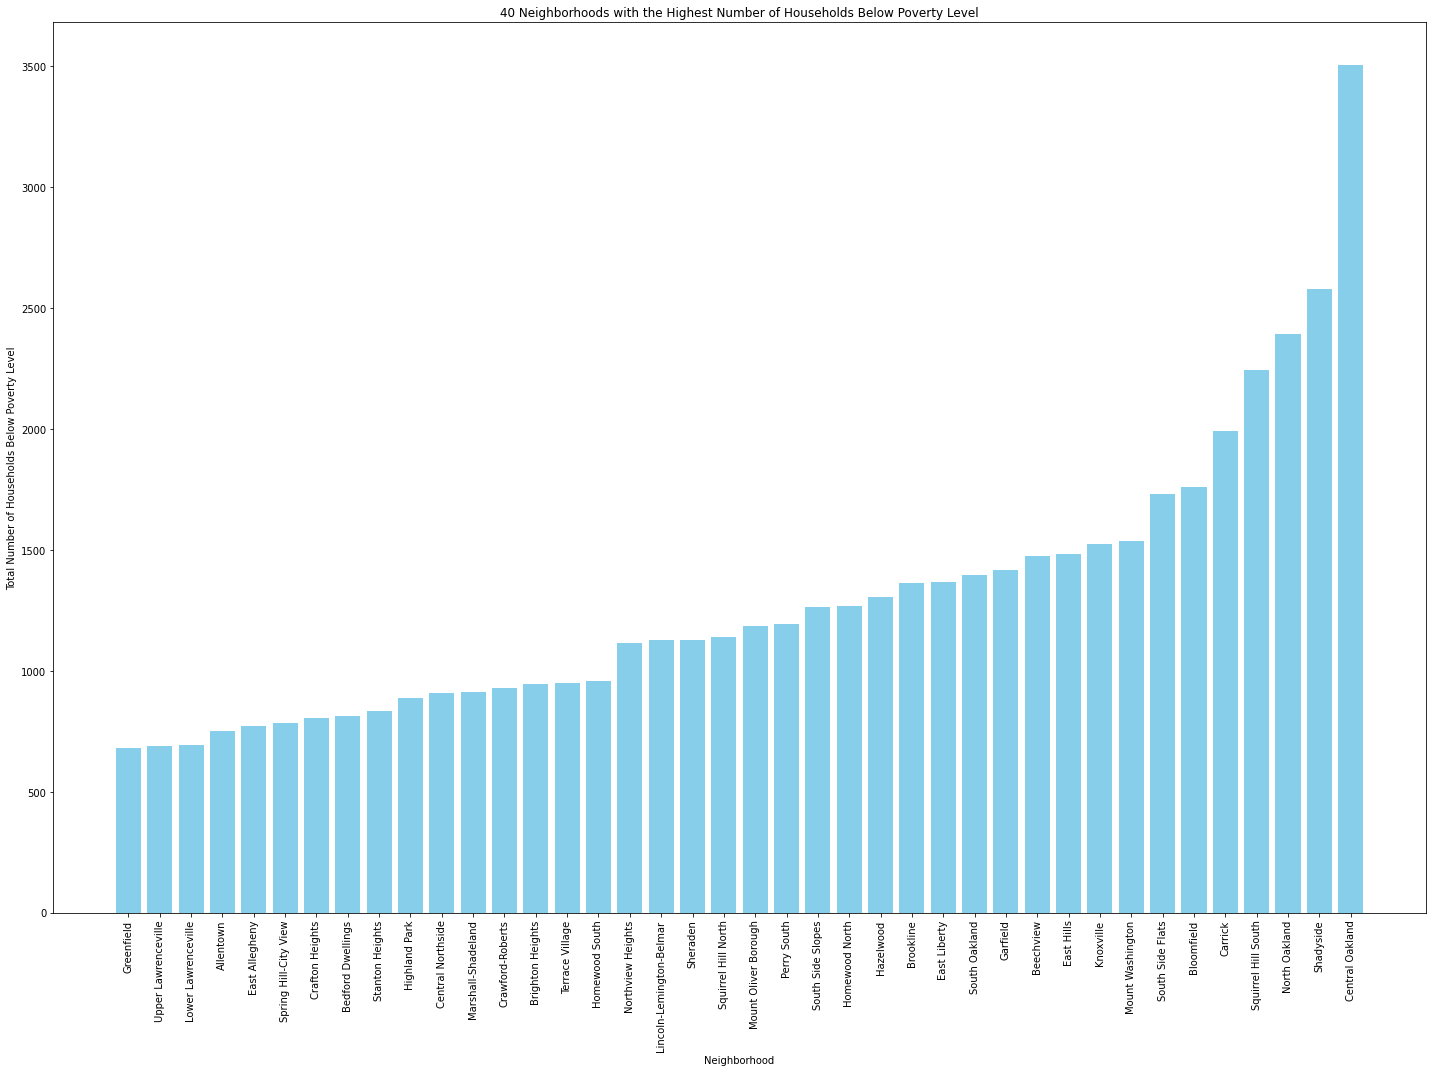

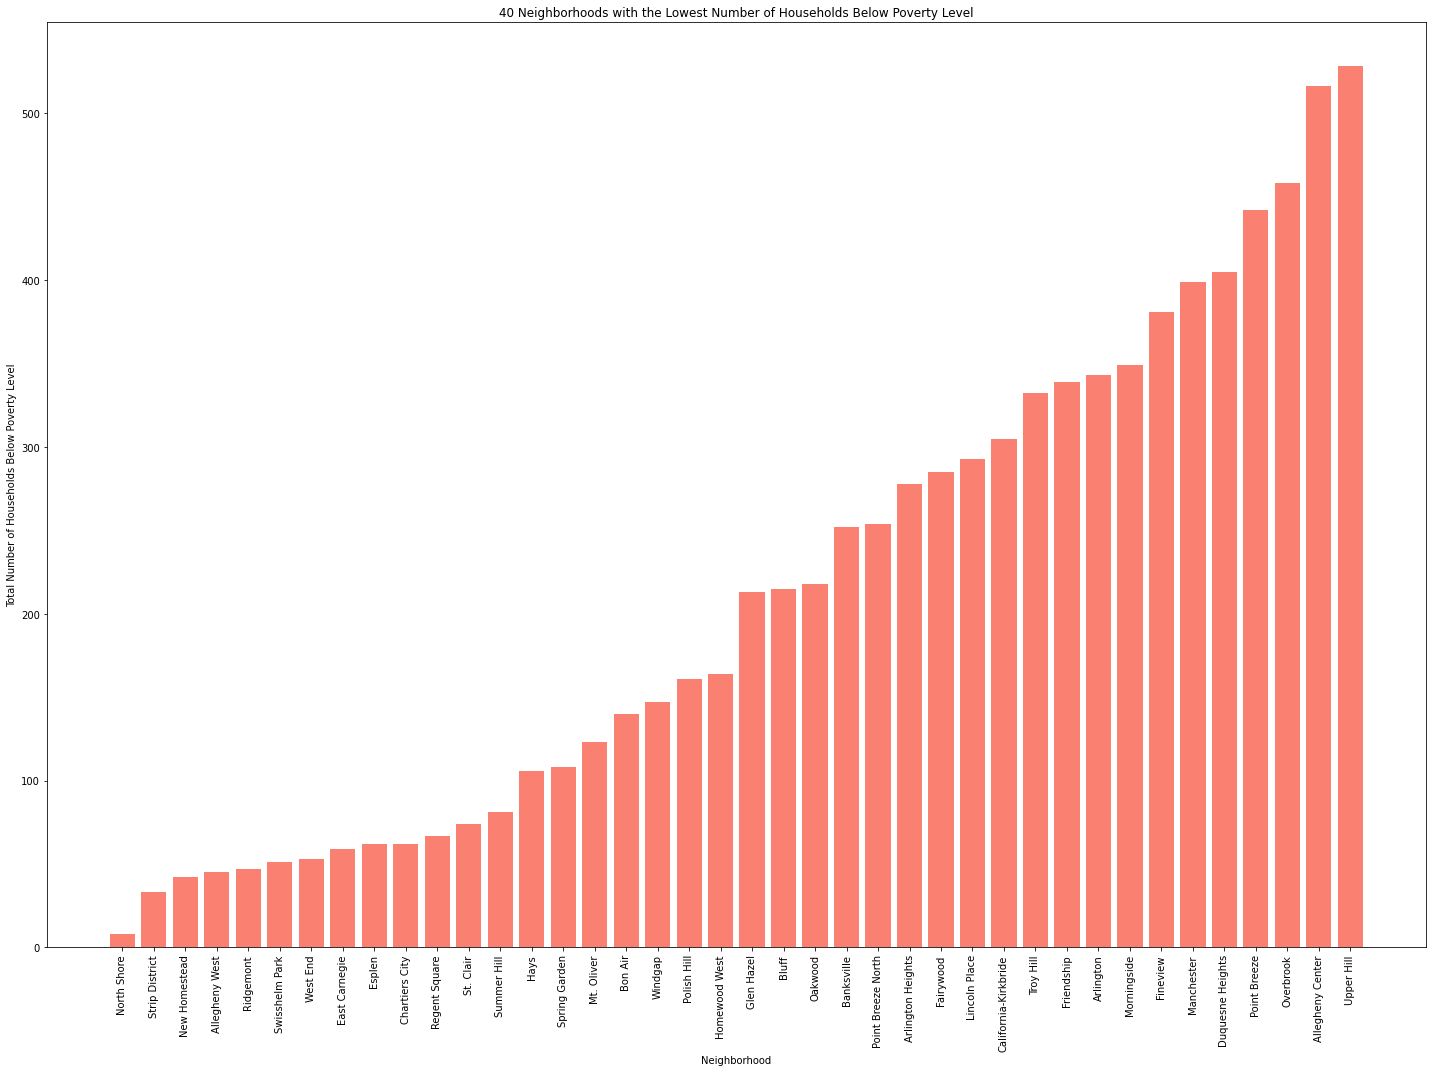

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

neighborhood_totals_below_poverty = {}

# Iterate over the rows of the DataFrame, and pairing each neighborhood with its respective poverty level
for index, row in df.iterrows():
    neighborhood = row['Neighborhood']
    below_poverty_total = row['Estimate; Income in the past 12 months below poverty level:']
    neighborhood_totals_below_poverty[neighborhood] = below_poverty_total

# Convert the dictionary to a DataFrame
df_below_poverty_totals = pd.DataFrame.from_dict(neighborhood_totals_below_poverty, orient='index', columns=['Total Below Poverty Level'])

# Filter out neighborhoods with zero entries
df_below_poverty_totals = df_below_poverty_totals[df_below_poverty_totals['Total Below Poverty Level'] > 0]

# Sort the DataFrame by the totals
df_below_poverty_totals_sorted = df_below_poverty_totals.sort_values(by='Total Below Poverty Level')

# Select the bottom 50 neighborhoods and top 50 neighborhoods
bottom_40_neighborhoods_below_poverty = df_below_poverty_totals_sorted.head(40)
top_40_neighborhoods_below_poverty = df_below_poverty_totals_sorted.tail(40)

# Plotting the bar plots for the top 50 neighborhoods
plt.figure(figsize=(20, 15))
plt.bar(top_40_neighborhoods_below_poverty.index, top_40_neighborhoods_below_poverty['Total Below Poverty Level'], color='skyblue')
plt.title('40 Neighborhoods with the Highest Number of Households Below Poverty Level')
plt.xlabel('Neighborhood')
plt.ylabel('Total Number of Households Below Poverty Level')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting the bar plots for the bottom 40 neighborhoods
plt.figure(figsize=(20, 15))
plt.bar(bottom_40_neighborhoods_below_poverty.index, bottom_40_neighborhoods_below_poverty['Total Below Poverty Level'], color='salmon')
plt.title('40 Neighborhoods with the Lowest Number of Households Below Poverty Level')
plt.xlabel('Neighborhood')
plt.ylabel('Total Number of Households Below Poverty Level')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()





The above graphics represent the Pittsburgh neighborhoods with the highest and lowest amounts of households in poverty.

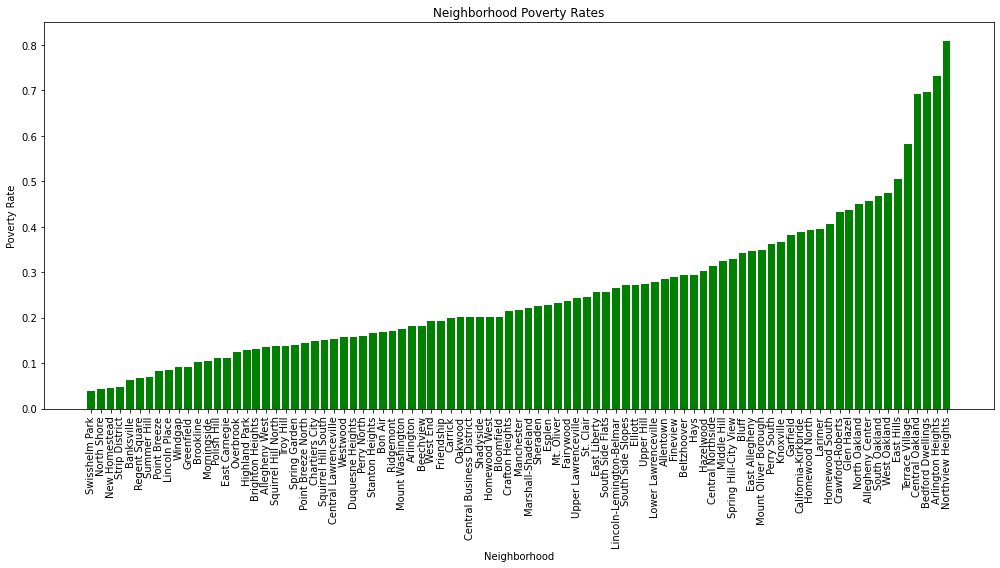

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data = []

# Iterate over the neighborhoods in the dictionary, calculating the poverty rate 
for neighborhood, below_poverty_total in neighborhood_totals_below_poverty.items():
    # Get the total households for the neighborhood
    total_households = df.loc[df['Neighborhood'] == neighborhood, 'Estimate; Total:'].iloc[0]
    
    # Calculate the poverty rate
    if below_poverty_total > 0:  # Filter out zero values
        poverty_rate = below_poverty_total / total_households
    else:
        continue

    # Append the data to the list
    data.append({'Neighborhood': neighborhood, 'Below Poverty Total': below_poverty_total, 'Total Households': total_households, 'Poverty Rate': poverty_rate})

# Create a DataFrame from the list of data
df_poverty_rates = pd.DataFrame(data)

# Sort the DataFrame by the 'Poverty Rate' column
df_sorted = df_poverty_rates.sort_values(by='Poverty Rate')

# Plotting all neighborhood poverty levels in one bar chart
plt.figure(figsize=(14, 8))

plt.bar(df_sorted['Neighborhood'], df_sorted['Poverty Rate'], color='green')

plt.title('Neighborhood Poverty Rates')
plt.xlabel('Neighborhood')
plt.ylabel('Poverty Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



The above graphic represents the total amount of households in poverty within each Pittsburgh neighborhood by the total number of households to generate a more unbiased reflection of poverty in each area. This standardized representation of poverty is not affected by population and can be used to compare neighborhoods to one another.

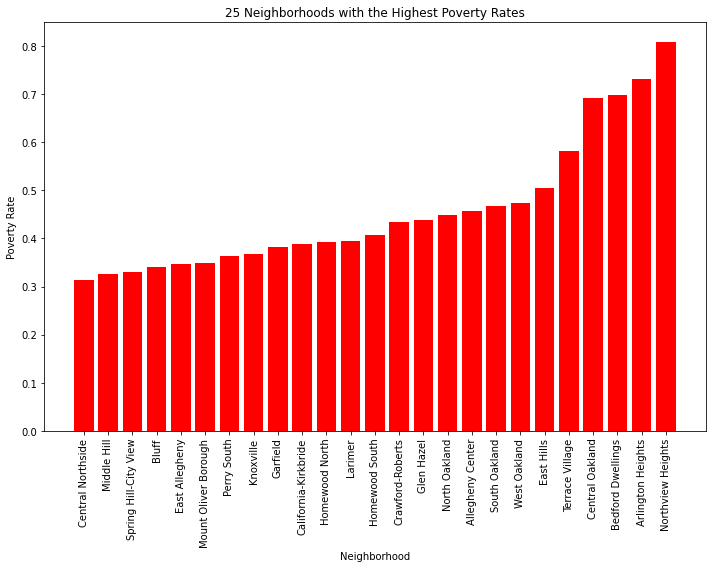

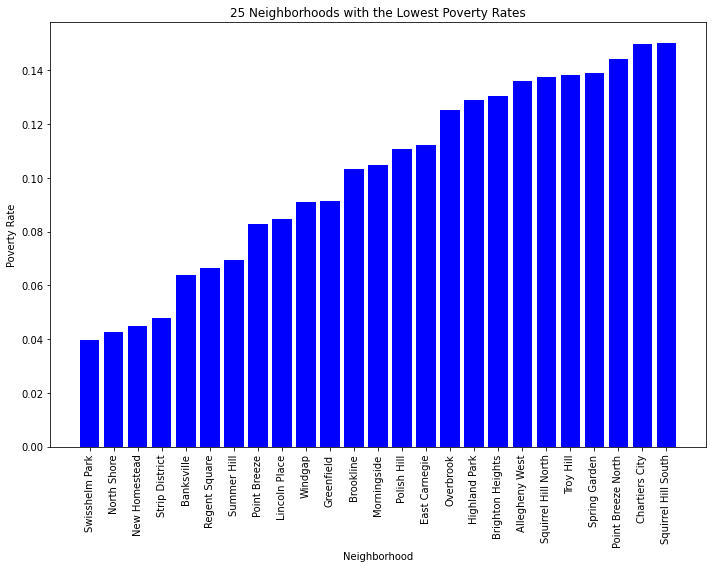

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

data = []

# Iterate over the neighborhoods in the dictionary, calculating the poverty rate 
for neighborhood, below_poverty_total in neighborhood_totals_below_poverty.items():
    # Get the total households for the neighborhood
    total_households = df.loc[df['Neighborhood'] == neighborhood, 'Estimate; Total:'].iloc[0]
    
    # Calculate the poverty rate
    if below_poverty_total > 0:  # Filter out zero values
        poverty_rate = below_poverty_total / total_households
    else:
        continue

    # Filter out neighborhoods with poverty rates below zero or above 1
    if 0 <= poverty_rate <= 1:
        # Append the data to the list
        data.append({'Neighborhood': neighborhood, 'Below Poverty Total': below_poverty_total, 'Total Households': total_households, 'Poverty Rate': poverty_rate})

# Create a DataFrame from the list of data
df_poverty_rates_filtered = pd.DataFrame(data)

# Sort the DataFrame by the 'Poverty Rate' column
df_sorted = df_poverty_rates_filtered.sort_values(by='Poverty Rate')

# Select the top 25 highest and lowest poverty rates
top_25_highest = df_sorted.tail(25)
top_25_lowest = df_sorted.head(25)

# Plotting the bar plots for the top 25 highest poverty rates
plt.figure(figsize=(10, 8))
plt.bar(top_25_highest['Neighborhood'], top_25_highest['Poverty Rate'], color='red')
plt.title('25 Neighborhoods with the Highest Poverty Rates')
plt.xlabel('Neighborhood')
plt.ylabel('Poverty Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting the bar plots for the top 25 lowest poverty rates
plt.figure(figsize=(10, 8))
plt.bar(top_25_lowest['Neighborhood'], top_25_lowest['Poverty Rate'], color='blue')
plt.title('25 Neighborhoods with the Lowest Poverty Rates')
plt.xlabel('Neighborhood')
plt.ylabel('Poverty Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()





A very liveable neighborhood could be one that has a low poverty rate and a less liveable place could be one with a high poverty rate. The above graphics are the 25 highest and lowest poverty rates.